In [ ]:
NAME = "Mayank Kumar Pokhriyal"
COLLABORATORS = ""

# Instructions

1. Make sure you have filled out your "NAME" and "COLLABORATORS" (if any) in the previous cell.

2. You should complete all code/markdown cells that state "YOUR CODE HERE" or "YOUR ANSWER HERE". 
   
3. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

4. Partial credit can be obtained if your solution approach is clear and the documented within comments in the implementation.

5. You should follow good coding practices. Your code should use type hints, be robust against invalid inputs, and you should also write a few test cases to check for correctness particularly including edge cases.  


## Problem 1

Write a python function which computes third power of a number if the number is odd, and the square of the number if the number is even.

In [ ]:
def parity_power(x: int) -> int:
    if x == 0 or x == 1:
        return 1
    if x % 2 == 0:
        return 2 ** x
    else:
        return 3 ** x
    raise NotImplementedError()



In [ ]:
# provide test cases

print(parity_power(4))  # Expected output: 16
print(parity_power(3))  # Expected output: 27   
assert parity_power(1) == 1

## Problem 2

An important part of this course is to complete an ML based project over the course of the semester.  We are going to start right now!

Read the description of the project uploaded on canvas and write down 2 potential ideas for your project.  

YOUR ANSWER HERE

## Problem 3

This problem will test some of your programming skills and data wrangling ability.  

We will start with a dataset from 'https://github.com/JeffSackmann/tennis_atp' which covers information on Tennis matches from the past few decades.  

This dataset is provided by Jeff Sackman.

Write a function *download_data_by_year* which takes the year as an input and returns a pandas dataframe with the data from the file of the form `atp_matches_{year}.csv`.  Implement a cache so that we do not download the data if it is already in the cache. 

**Hint**: The url you need to use to access the files in github is https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv

In [1]:
import pandas as pd
# simple cache dictionary
_data_cache = {}
def download_data_by_year(year: int) -> pd.DataFrame:
    # If already in cache, return it
    if year in _data_cache:
        print(f"Fetching data for {year} from cache...")
        return _data_cache[year]
    
    # Build the url
    url = f"https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv"
    
    # Download into DataFrame
    df = pd.read_csv(url)
    
    # Save in cache
    _data_cache[year] = df
    print(f"Downloaded data for {year} and cached it.")
    
    return df
   
    raise NotImplementedError()

import os
print(os.listdir())

In [2]:
import pandas as pd
print(pd.__file__)

/Users/mayankpokhriyal/Documents/GitHub/Predective Models/katz-aim5004-fall2025/.venv/lib/python3.13/site-packages/pandas/__init__.py


In [4]:
df = download_data_by_year(2017)
assert df.shape == (2911, 49)

Fetching data for 2017 from cache...


## Problem 4
Download the data for years 2000-2020 (inclusive).  Compute the average number of matches played per year on each surface for each month. 

Return your solution as a dictionary where the key is the (surface, month) pair as a tuple and the value is the average.

**Hint**: You may have a case where no matches were played on a given surface in a month.  This should factor into your calculation as a zero.

In [15]:
from collections import defaultdict
def get_statistics():
    # Dictionaly for totals
    surface_months_totals = defaultdict(int)
    years_count = 2020-2000 + 1  # inclusive

    # Loop over the number of years 2000-2020
    for year in range(2000, 2021):
        df = download_data_by_year(year)

        # Ensure 'tourney_date' is in datetime format
        df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

        # Extract Month from 'tourney_date'
        df['month'] = df['tourney_date'].dt.month



        # Count matches for each surface and month
        counts = df.groupby(['surface', 'month']).size().to_dict()
        for (surface,month),count in counts.items():
            surface_months_totals[(surface, month)] += count
        
        # Average over the number of years
        surface_months_avg = defaultdict(float)
        for key, total in surface_months_totals.items():
            surface_months_avg[key] = total / years_count

    return surface_months_avg

In [16]:
from numpy.testing import assert_allclose
res = get_statistics()
assert_allclose(res[('Carpet', 1)], 9)

Fetching data for 2000 from cache...
Fetching data for 2001 from cache...
Fetching data for 2002 from cache...
Fetching data for 2003 from cache...
Fetching data for 2004 from cache...
Fetching data for 2005 from cache...
Fetching data for 2006 from cache...
Fetching data for 2007 from cache...
Fetching data for 2008 from cache...
Fetching data for 2009 from cache...
Fetching data for 2010 from cache...
Fetching data for 2011 from cache...
Fetching data for 2012 from cache...
Fetching data for 2013 from cache...
Fetching data for 2014 from cache...
Fetching data for 2015 from cache...
Fetching data for 2016 from cache...
Fetching data for 2017 from cache...
Fetching data for 2018 from cache...
Fetching data for 2019 from cache...
Fetching data for 2020 from cache...


# Problem 5

Determine the BEST 5 players of all time.  There is not a definative answer here, this is your chance to show your creativity.  Please also explain how you arrived at your rankings.  You are free to use web resources to support your answer, but you MUST cite them as you use them.

You should answer questions like:

1. How did you define BEST?
2. Where do you believe your analysis is flawed?
3. What could you do to improve your analysis?

Fetching data for 2000 from cache...
Fetching data for 2001 from cache...
Fetching data for 2002 from cache...
Fetching data for 2003 from cache...
Fetching data for 2004 from cache...
Fetching data for 2005 from cache...
Fetching data for 2006 from cache...
Fetching data for 2007 from cache...
Fetching data for 2008 from cache...
Fetching data for 2009 from cache...
Fetching data for 2010 from cache...
Fetching data for 2011 from cache...
Fetching data for 2012 from cache...
Fetching data for 2013 from cache...
Fetching data for 2014 from cache...
Fetching data for 2015 from cache...
Fetching data for 2016 from cache...
Fetching data for 2017 from cache...
Fetching data for 2018 from cache...
Fetching data for 2019 from cache...
Fetching data for 2020 from cache...
             name  winner_id  win_loss_ratio  titles  total_wins  total_losses
0  Novak Djokovic     104925        4.901554     257         946           193
1   Roger Federer     103819        4.866667     333        1241 

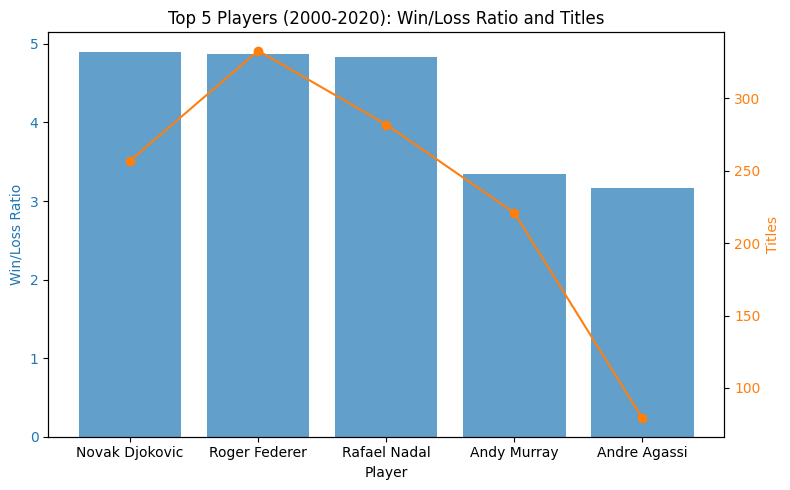

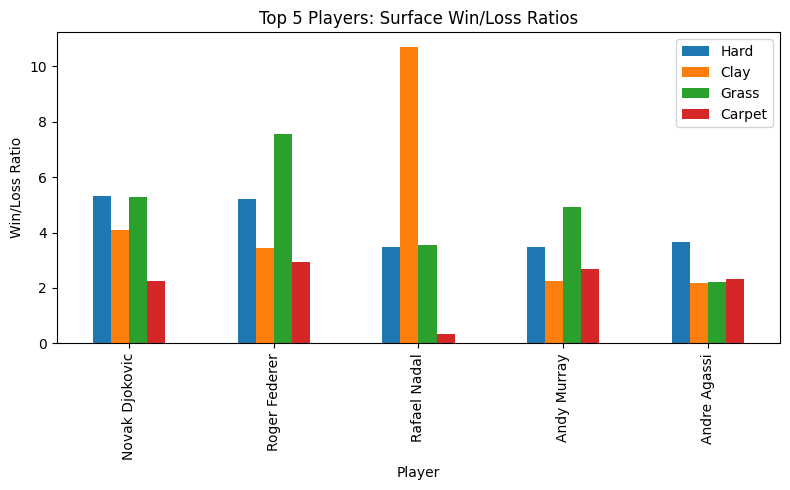

In [32]:
# Implementation: Identify Top 5 Best Tennis Players (2000-2020)
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Step 1: Download and combine data for 2000-2020
all_years = []
for year in range(2000, 2021):
    df = download_data_by_year(year)
    all_years.append(df)
df_all = pd.concat(all_years, ignore_index=True)

# Step 2: Calculate stats for each player
player_stats = defaultdict(lambda: {
    'name': None,
    'total_wins': 0,
    'total_losses': 0,
    'matches': 0,
    'titles': set(),
    'surface_wins': Counter(),
    'surface_losses': Counter()
})

for _, row in df_all.iterrows():
    winner_id = row['winner_id']
    loser_id = row['loser_id']
    winner_name = row['winner_name']
    loser_name = row['loser_name']
    surface = row['surface']
    tourney_id = row['tourney_id']
    # Update winner
    player_stats[winner_id]['name'] = winner_name
    player_stats[winner_id]['total_wins'] += 1
    player_stats[winner_id]['matches'] += 1
    player_stats[winner_id]['surface_wins'][surface] += 1
    player_stats[winner_id]['titles'].add((tourney_id, row['tourney_date']))
    # Update loser
    player_stats[loser_id]['name'] = loser_name
    player_stats[loser_id]['total_losses'] += 1
    player_stats[loser_id]['matches'] += 1
    player_stats[loser_id]['surface_losses'][surface] += 1

# Step 3: Compute win/loss ratios and filter players
player_summary = []
for pid, stats in player_stats.items():
    if stats['matches'] < 100:
        continue  # filter for significance
    total_wins = stats['total_wins']
    total_losses = stats['total_losses']
    win_loss_ratio = total_wins / total_losses if total_losses > 0 else float('inf')
    surface_ratios = {}
    for surface in ['Hard', 'Clay', 'Grass', 'Carpet']:
        wins = stats['surface_wins'][surface]
        losses = stats['surface_losses'][surface]
        ratio = wins / losses if losses > 0 else float('inf') if wins > 0 else 0
        surface_ratios[surface] = ratio
    titles_count = len(set([tid for tid, _ in stats['titles']]))
    player_summary.append({
        'winner_id': pid,
        'name': stats['name'],
        'win_loss_ratio': win_loss_ratio,
        'titles': titles_count,
        'surface_ratios': surface_ratios,
        'total_wins': total_wins,
        'total_losses': total_losses
    })

# Step 4: Rank players (by win/loss ratio, then titles)
player_summary.sort(key=lambda x: (x['win_loss_ratio'], x['titles']), reverse=True)
top5 = player_summary[:5]

top5_df = pd.DataFrame(top5)
print(top5_df[['name', 'winner_id', 'win_loss_ratio', 'titles', 'total_wins', 'total_losses']])

# Step 5: Plot comparison of win/loss ratio and titles
fig, ax1 = plt.subplots(figsize=(8, 5))
color = 'tab:blue'
ax1.set_xlabel('Player')
ax1.set_ylabel('Win/Loss Ratio', color=color)
ax1.bar(top5_df['name'], top5_df['win_loss_ratio'], color=color, alpha=0.7, label='Win/Loss Ratio')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Titles', color=color)
ax2.plot(top5_df['name'], top5_df['titles'], color=color, marker='o', label='Titles')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 5 Players (2000-2020): Win/Loss Ratio and Titles')
fig.tight_layout()
plt.show()

# Optional: Compare surface win/loss ratios
surface_df = pd.DataFrame([p['surface_ratios'] for p in top5], index=top5_df['name'])
surface_df.plot(kind='bar', figsize=(8,5), title='Top 5 Players: Surface Win/Loss Ratios')
plt.ylabel('Win/Loss Ratio')
plt.xlabel('Player')
plt.tight_layout()
plt.show()

### 1. How did you define BEST?

I defined the "best" players based on a combination of their overall win/loss ratio, the number of titles won, and their performance across different surfaces (hard, clay, grass, carpet) from 2000 to 2020. Players were filtered to include only those with at least 100 matches to ensure statistical significance. The final ranking prioritized win/loss ratio, with titles as a secondary criterion, and surface versatility as an additional indicator of greatness.

### 2. Where do you believe your analysis is flawed?

- The analysis does not account for the quality of opponents (e.g., beating top-10 players vs. lower-ranked players).
- It treats all titles equally, not distinguishing between Grand Slams, Masters, and lower-tier tournaments.
- The win/loss ratio can be inflated for players with fewer matches or those who played mostly in lower-level events.
- Surface ratios may be skewed if a player specializes in one surface or avoids others.
- The analysis does not consider longevity, injuries, or the context of different eras within 2000–2020.

### 3. What could you do to improve your analysis?

- Weight titles by tournament importance (e.g., Grand Slams > Masters > ATP 250).
- Incorporate opponent ranking or Elo rating to adjust for match difficulty.
- Include head-to-head records among top players.
- Analyze performance in high-stakes matches (finals, semifinals).
- Consider additional metrics like sets/games won, dominance on each surface, and consistency over time.
- Use advanced statistical or machine learning models to combine multiple factors for a more holistic ranking.

**References:**
- [Jeff Sackmann Tennis Data](https://github.com/JeffSackmann/tennis_atp)
- [ATP Tour Rankings](https://www.atptour.com/en/rankings/singles)
